<a href="https://colab.research.google.com/github/leandrodmf/Drug_Reg_ANVISA/blob/main/Drug_Reg_ANVISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**: Drug Registrations in Brazil
### Author: Leandro França

#### ANVISA DATABASE: Medicines Registered in Brazil
#### Data URL: https://dados.gov.br/dados/conjuntos-dados/medicamentos-registrados-no-brasil

**Description**: This script builds a sequential evaluation of the data, trying to evaluate critically the data outputs.

-The dataset used in this example contains the **following features**:
- 'PRODUCT_TYPE';
- 'PRODUCT_NAME';
- 'PROCESS_END_DATE';
- 'REGULATORY_CATEGORY';
- 'PRODUCT_REGISTRATION_NUMBER';
- 'REGISTRATION_EXPIRATION_DATE';
- 'PROCESS_NUMBER';
- 'THERAPEUTIC_CLASS';
- 'REGISTRATION_HOLDER_COMPANY';
- 'REGISTRATION_STATUS';
- 'ACTIVE_INGREDIENT'.

The script loads and preprocesses the data using the StandardScaler class from the scikit-learn library. It then splits the data into training and testing sets using the train_test_split function from scikit-learn.

**Dependencies**:
- pandas;
- matplotlib;
- Seaborn.

**ATTENTION**: Run the script in a Python environment, but use responsably. Mistakes can be commited.

**Results**: Check README file on github repository.

# 1. Organizating the Data

In [2]:
import pandas as pd

# Loading the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/RegMed/DADOS_ABERTOS_MEDICAMENTOS.csv', sep=';', encoding='latin-1')
df.head()

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,250000254169821,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,2501017185899,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,253510228050056,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,MEDICAMENTO,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,2502500782199,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,MEDICAMENTO,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,253510326310184,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN


In [3]:
translation_dict = {
    "TIPO_PRODUTO": "PRODUCT_TYPE",
    "NOME_PRODUTO": "PRODUCT_NAME",
    "DATA_FINALIZACAO_PROCESSO": "PROCESS_FINALIZATION_DATE",
    "CATEGORIA_REGULATORIA": "REGULATORY_CATEGORY",
    "NUMERO_REGISTRO_PRODUTO": "PRODUCT_REGISTRATION_NUMBER",
    "DATA_VENCIMENTO_REGISTRO": "REGISTRATION_EXPIRATION_DATE",
    "NUMERO_PROCESSO": "PROCESS_NUMBER",
    "CLASSE_TERAPEUTICA": "THERAPEUTIC_CLASS",
    "EMPRESA_DETENTORA_REGISTRO": "REGISTRATION_HOLDER_COMPANY",
    "SITUACAO_REGISTRO": "REGISTRATION_STATUS",
    "PRINCIPIO_ATIVO": "ACTIVE_INGREDIENT"
}

# Renaming the columns names
df = df.rename(columns=translation_dict)

In [22]:
# prompt: exportar dataframe como csv

# Exportar o DataFrame como um arquivo CSV
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/RegMed/MEDS_OPEN_DATA.csv', index=False)  # index=False evita que o índice do DataFrame seja salvo no CSV

## 1.1 Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31317 entries, 0 to 31316
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   PRODUCT_TYPE                  31317 non-null  object
 1   PRODUCT_NAME                  31317 non-null  object
 2   PROCESS_FINALIZATION_DATE     30799 non-null  object
 3   REGULATORY_CATEGORY           29440 non-null  object
 4   PRODUCT_REGISTRATION_NUMBER   31317 non-null  int64 
 5   REGISTRATION_EXPIRATION_DATE  30697 non-null  object
 6   PROCESS_NUMBER                31317 non-null  int64 
 7   THERAPEUTIC_CLASS             31236 non-null  object
 8   REGISTRATION_HOLDER_COMPANY   31317 non-null  object
 9   REGISTRATION_STATUS           31317 non-null  object
 10  ACTIVE_INGREDIENT             11669 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.6+ MB


In [5]:
# Finding Missing Values

# All Data
unique_counts = df.nunique()
missing_counts = df.isnull().sum()
summary_df = pd.DataFrame({'Unique Values': unique_counts, 'Missing Values': missing_counts})

# Valid Register Data
df_valid = df[df['REGISTRATION_STATUS'] == 'VÁLIDO']
unique_counts_valid = df_valid.nunique()
missing_counts_valid = df_valid.isnull().sum()
summary_df_valid = pd.DataFrame({'Unique Values': unique_counts_valid, 'Missing Values': missing_counts_valid})
summary_df_valid

# Summary dataframe
summary_combined = pd.concat([summary_df, summary_df_valid], axis=1, keys=['All Data', 'Valid Registrations'])
summary_combined

All Data                Valid Registrations  \
                             Unique Values Missing Values       Unique Values   
PRODUCT_TYPE                             1              0                   1   
PRODUCT_NAME                         18710              0                8037   
PROCESS_FINALIZATION_DATE             2970            518                1919   
REGULATORY_CATEGORY                      9           1877                   9   
PRODUCT_REGISTRATION_NUMBER          31317              0               11732   
REGISTRATION_EXPIRATION_DATE           524            620                 293   
PROCESS_NUMBER                       31312              0               11727   
THERAPEUTIC_CLASS                      702             81                 548   
REGISTRATION_HOLDER_COMPANY            718              0                 359   
REGISTRATION_STATUS                      2              0                   1   
ACTIVE_INGREDIENT                     2544          19648                2544   

                                             
                             Missing Values  
PRODUCT_TYPE                              0  
PRODUCT_NAME                              0  
PROCESS_FINALIZATION_DATE               518  
REGULATORY_CATEGORY                      94  
PRODUCT_REGISTRATION_NUMBER               0  
REGISTRATION_EXPIRATION_DATE            487  
PROCESS_NUMBER                            0  
THERAPEUTIC_CLASS                        62  
REGISTRATION_HOLDER_COMPANY               0  
REGISTRATION_STATUS                       0  
ACTIVE_INGREDIENT                        63

In [6]:
# Evaluating Regulatory cathegory

print(df_valid["REGULATORY_CATEGORY"].value_counts())
print(f'NaN number: {df_valid["REGULATORY_CATEGORY"].isnull().sum()}.')

REGULATORY_CATEGORY
GENÉRICO        4455
SIMILAR         3957
NOVO            1457
ESPECÍFICO       729
BIOLÓGICO        536
FITOTERÁPICO     380
DINAMIZADO        75
RADIOFÁRMACO      42
PRODUTO DE T       7
Name: count, dtype: int64
NaN number: 94.


# 2. Exploratory Data Analysis

## 2.1 Drug Registration by the Time

In [36]:
# Removing the unfinalized process and setting the datetime.
df["PROCESS_FINALIZATION_DATE"] = pd.to_datetime(df["PROCESS_FINALIZATION_DATE"], format="%d/%m/%Y", errors="coerce")

df_allregs = df.dropna(subset=["PROCESS_FINALIZATION_DATE"])
df_allregs = df_allregs[["PROCESS_FINALIZATION_DATE", "REGULATORY_CATEGORY","PRODUCT_REGISTRATION_NUMBER"]]

# Year column
df_allregs['YEAR'] = df_allregs.PROCESS_FINALIZATION_DATE.dt.year

# Creating 'new_reg_cat' column

catgs = ['ESPECÍFICO', 'BIOLÓGICO', 'FITOTERÁPICO', 'DINAMIZADO', 'RADIOFÁRMACO', 'PRODUTO DE T']

def categorize_regulation(x):
  if x in ['NOVO', 'GENÉRICO', 'SIMILAR']:
    return x
  elif x in catgs:
    return 'Others'
  else:
    return 'No category'

df_allregs['new_reg_cat'] = df_allregs['REGULATORY_CATEGORY'].apply(categorize_regulation)
df_allregs = df_allregs.rename(columns = {'NOVO': 'New', 'GENÉRICO': 'Generic', 'SIMILAR': 'Similar'})

df_allregs['new_reg_cat'] = df_allregs['new_reg_cat'].replace({'NOVO': 'New', 'GENÉRICO': 'Generic', 'SIMILAR': 'Similar'})
df_allregs.drop(labels = ['PROCESS_FINALIZATION_DATE', 'REGULATORY_CATEGORY'], axis = 1, inplace = True)

df_allregs = pd.crosstab(index = df_allregs.YEAR, columns = df_allregs.new_reg_cat, values = df_allregs.PRODUCT_REGISTRATION_NUMBER, aggfunc="count")

df_allregs = df_allregs.reindex(columns=['New', 'Generic', 'Similar', 'Others', 'No category'])

# Only registers beyond 1995
df_allregs = df_allregs[df_allregs.index >= 1995]

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

# Defining Pallete colors
BLUE1, BLUE2, BLUE3, BLUE4, BLUE5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
GRAY1, GRAY2, GRAY3, GRAY4, GRAY5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
RED1, ORAGNE1, YELLOW1, GREEN1, GREEN2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [9]:
# Plotting line graph
fig = px.line(df_allregs, x=df_allregs.index, y=df_allregs.columns, markers=True, labels={'new_reg_cat':'Regulatory Category'},
              color_discrete_sequence=[BLUE2, RED1, YELLOW1 , GREEN1, GRAY2])

# Adjusting the layout
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= GRAY2, title_font_color= GRAY1, title_font_size=24,
                  title_text='Brazil Drug Registrations' +
                             '<br><sup size=1 style="color:#555655">From 1995 to 2024</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= GRAY5)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Year:</b> %{x} <br> <b>Registers:</b> %{y}")
fig.update_layout(hovermode="x unified")  # to display the summary of all data in the period
fig.show()

### 2.1.1 Missclafied data

In [10]:
df_allregs2 = df.dropna(subset=['PROCESS_FINALIZATION_DATE'])
df_allregs2 = df_allregs2[['PROCESS_FINALIZATION_DATE', 'REGULATORY_CATEGORY','PRODUCT_REGISTRATION_NUMBER', 'THERAPEUTIC_CLASS']]
df_allregs2['ano'] = df_allregs2.PROCESS_FINALIZATION_DATE.dt.year
df_allregs2 = pd.crosstab(index = df_allregs2.ano, columns = df_allregs2.REGULATORY_CATEGORY, values = df_allregs2.PRODUCT_REGISTRATION_NUMBER, aggfunc="count")
df_allregs2 = df_allregs2[df_allregs2.index >= 2008]
df_allregs2

REGULATORY_CATEGORY,BIOLÓGICO,DINAMIZADO,ESPECÍFICO,FITOTERÁPICO,GENÉRICO,NOVO,PRODUTO DE T,RADIOFÁRMACO,SIMILAR
ano,,,,,,,,,
2008,30.0,15.0,61.0,41.0,341.0,52.0,NaN,NaN,136.0
2009,37.0,11.0,39.0,24.0,377.0,68.0,NaN,NaN,192.0
2010,29.0,7.0,37.0,39.0,215.0,65.0,NaN,NaN,145.0
2011,19.0,2.0,60.0,20.0,246.0,93.0,NaN,NaN,243.0
2012,14.0,4.0,30.0,29.0,293.0,38.0,NaN,NaN,231.0
2013,12.0,1.0,24.0,36.0,196.0,52.0,NaN,NaN,228.0
2014,22.0,4.0,39.0,14.0,156.0,61.0,NaN,NaN,86.0
2015,29.0,2.0,24.0,2.0,496.0,59.0,NaN,2.0,328.0
2016,25.0,2.0,23.0,2.0,384.0,31.0,NaN,1.0,310.0


In [11]:
# prompt: mudar o nome das colunas de de_allregs2

# Rename columns in df_allregs2
new_column_names = {
    'ESPECÍFICO': 'SPECIFIC',
    'BIOLÓGICO': 'BIOLOGICAL',
    'FITOTERÁPICO': 'PHUTOTHERAPICUS',
    'DINAMIZADO': 'DYNAMIZED',
    'RADIOFÁRMACO': 'RADIOPHARMACEUTICA',
    'NOVO': 'NEW',
    'GENÉRICO': 'GENERIC',
    'SIMILAR': 'SIMILAR',
    'PRODUTO DE T': 'PRODUCT T',
    'NaN': 'NO CATEGORY'
}

df_allregs2 = df_allregs2.rename(columns=new_column_names)

In [12]:
# Lista de categorias específicas
catgs = ['SPECIFIC', 'BIOLOGICAL', 'PHYTOTHERAPEUTIC', 'DYNAMIZED', 'RADIOPHARMACEUTICAL', 'T PRODUCT']

# Assumindo que você já tem um DataFrame chamado 'df'
df_allregs2 = df.dropna(subset=['PROCESS_FINALIZATION_DATE'])
df_allregs2 = df_allregs2[['PROCESS_FINALIZATION_DATE', 'REGULATORY_CATEGORY','PRODUCT_REGISTRATION_NUMBER', 'THERAPEUTIC_CLASS']]
df_allregs2['ano'] = df_allregs2.PROCESS_FINALIZATION_DATE.dt.year

# Criando a coluna 'new_reg_cat' com a categorização correta
def categorize_regulation(x):
  if x in ['NEW', 'GENERIC', 'SIMILAR']:
    return x
  elif x in catgs:
    return 'Others'
  else:
    return 'No class'

df_allregs2['new_reg_cat'] = df_allregs2['REGULATORY_CATEGORY'].apply(categorize_regulation)
df_allregs2 = df_allregs2[(df_allregs2['new_reg_cat'] == 'No class') & (df_allregs2['ano'] == 2011)]

# # Criando a tabela cruzada com contagem dos registros
# df_allregs2 = pd.crosstab(
#     index=df_allregs2.ano,
#     columns=df_allregs2.new_reg_cat,
#     values=df_allregs2.NUMERO_REGISTRO_PRODUTO,
#     aggfunc="count"
# )

# # Filtrando os dados a partir de 2008
# df_allregs2 = df_allregs2[df_allregs2.index >= 2008]

df_allregs2

<ipython-input-12-3b2fe7f546e8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-12-3b2fe7f546e8>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,PROCESS_FINALIZATION_DATE,REGULATORY_CATEGORY,PRODUCT_REGISTRATION_NUMBER,THERAPEUTIC_CLASS,ano,new_reg_cat
105,2011-03-21,NaN,178170089,BRONCODILATADORES,2011,No class
120,2011-12-05,GENÉRICO,102351053,ANTINFLAMATORIOS,2011,No class
121,2011-12-12,GENÉRICO,105830742,ANTINFLAMATORIOS,2011,No class
122,2011-12-12,GENÉRICO,167730357,ANTINFLAMATORIOS,2011,No class
241,2011-02-07,NaN,167730211,EXPECTORANTES BALSAMICOS E MUCOLITICO,2011,No class
...,...,...,...,...,...,...
29377,2011-02-07,NaN,167730228,GLICOCORTICOIDES TOPICOS - ASSOCIACAO MEDICAME...,2011,No class
29479,2011-07-11,ESPECÍFICO,100431053,DILUENTES E VEICULOS DE MEDICAMENTOS,2011,No class
29506,2011-01-10,NaN,172870166,ANTINFECCIOSOS TOPICOS,2011,No class
29518,2011-06-27,NaN,100410146,ANTINEOPLASICO,2011,No class


## 2.2 Theapeutical Class Registration


### 2.2.1 Temporal Series

In [13]:
# 5 most registered medicine by therapeutic class
top_5_tc = df['THERAPEUTIC_CLASS'].value_counts().nlargest(5).index
top_5_tc_df = df[df['THERAPEUTIC_CLASS'].isin(top_5_tc)][['THERAPEUTIC_CLASS', 'PRODUCT_REGISTRATION_NUMBER']].groupby('THERAPEUTIC_CLASS').count()
top_5_tc_df = top_5_tc_df.sort_values(by='PRODUCT_REGISTRATION_NUMBER', ascending=False)
top_5_tc_df = top_5_tc_df.rename(index={'ANALGESICOS NAO NARCOTICOS': 'Non-opioid analgesic',
                                         'ANTIBIOTICOS SISTEMICOS SIMPLES':	'Systemic antibiotics simple',
                                         'ANTIDEPRESSIVOS': 'Antidepressant',
                                         'ANTINEOPLASICO': 'Antineoplastic',
                                         'ANTINFLAMATORIOS': 'Non-steroidal anti-inflammatory'})
top_5_tc_df

,PRODUCT_REGISTRATION_NUMBER
THERAPEUTIC_CLASS,
Systemic antibiotics simple,1235
Non-steroidal anti-inflammatory,914
Non-opioid analgesic,878
Antineoplastic,770
Antidepressant,759


In [14]:
# DataFrame filtered with Top 5
df_allregs_tc = df[['PROCESS_FINALIZATION_DATE', 'PRODUCT_REGISTRATION_NUMBER', 'THERAPEUTIC_CLASS']].copy()
df_allregs_tc = pd.DataFrame(df_allregs_tc[df_allregs_tc['THERAPEUTIC_CLASS'].isin(top_5_tc)])

# Converting the 'Finalization Process Date' to datetime
df_allregs_tc['YEAR'] = df_allregs_tc.PROCESS_FINALIZATION_DATE.dt.year

# Crosstable with register count by year and Therapeutical Class
df_allregs_tc = pd.crosstab(
    index=df_allregs_tc.YEAR,
    columns=df_allregs_tc.THERAPEUTIC_CLASS,
    values=df_allregs_tc.PRODUCT_REGISTRATION_NUMBER,
    aggfunc="count")

# Renaming to ENG
df_allregs_tc = df_allregs_tc.rename(columns={'ANALGESICOS NAO NARCOTICOS': 'Non-opioid analgesic',
                                         'ANTIBIOTICOS SISTEMICOS SIMPLES':	'Systemic antibiotics simple',
                                         'ANTIDEPRESSIVOS': 'Antidepressant',
                                         'ANTINEOPLASICO': 'Antineoplastic',
                                         'ANTINFLAMATORIOS': 'Non-steroidal anti-inflammatory'})

# Data beyond 1995
df_allregs_tc = df_allregs_tc[df_allregs_tc.index >= 1995]

In [15]:
# Plotting line graph
fig = px.line(df_allregs_tc, x=df_allregs_tc.index, y=df_allregs_tc.columns, markers=True,
              color_discrete_sequence=[BLUE2, RED1, YELLOW1 , GREEN1, GRAY2])

# Adjusting the Layout
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= GRAY2, title_font_color= GRAY1, title_font_size=24,
                  title_text='Brazil Drug Registrations: by Theapeutical Class' +
                             '<br><sup size=1 style="color:#555655">From 1995 to 2024</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= GRAY5)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Year:</b> %{x} <br> <b>Registers:</b> %{y}")
fig.update_layout(hovermode="x unified")

fig.show()

### 2.2.2 Distribution evaluation

In [16]:
# Observing the statistics
df_allregs_tc.describe()

THERAPEUTIC_CLASS,Non-opioid analgesic,Systemic antibiotics simple,Antidepressant,Antineoplastic,Non-steroidal anti-inflammatory
count,29.000000,30.000000,30.000000,30.000000,30.000000
mean,28.448276,39.400000,24.366667,24.500000,29.433333
std,16.382888,31.169835,12.338567,12.342106,16.994286
min,2.000000,2.000000,7.000000,4.000000,6.000000
25%,20.000000,17.250000,16.250000,15.000000,18.250000
50%,27.000000,29.500000,21.500000,21.000000,27.000000
75%,32.000000,49.250000,28.750000,31.500000,34.500000
max,82.000000,127.000000,58.000000,52.000000,75.000000


<ipython-input-35-2fc1fc82bd24>:40: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



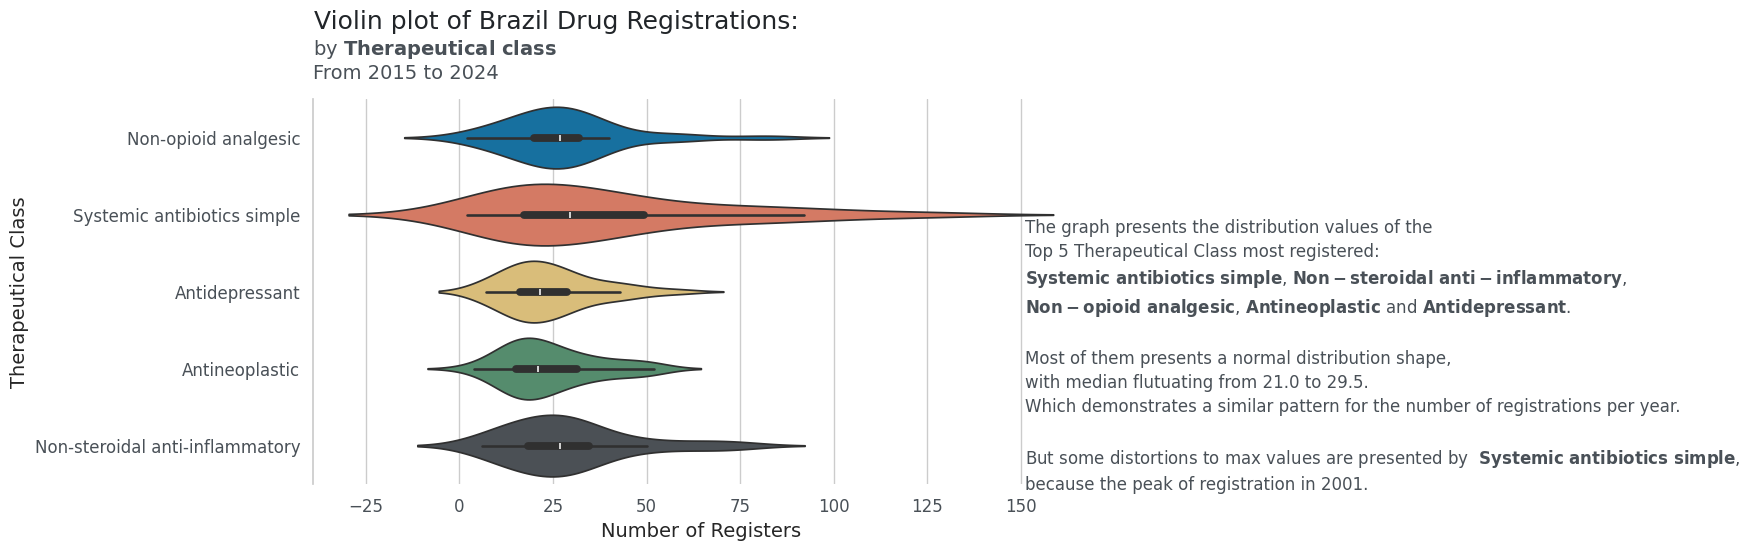

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns

# Reshape for violin plot using pandas.melt
df_melted = pd.melt(df_allregs_tc.reset_index(), id_vars=['YEAR'],
                    value_vars=df_allregs_tc.columns,
                    var_name='THERAPEUTIC_CLASS', value_name='Registers')

# Plotting area settings
fig, axs = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid")

# Violin plot
ax = sns.violinplot(data=df_melted, x='Registers', y='THERAPEUTIC_CLASS',
                    hue='THERAPEUTIC_CLASS',
                    palette=[BLUE2, RED1, YELLOW1 , GREEN1, GRAY2])

# Adjusting the Layout
plt.suptitle('Violin plot of Brazil Drug Registrations:', size=18, color=GRAY1, ha = 'right', x = 0.61, y = 1.06)

plt.title(r'by $\bf{Therapeutical\ class}$'+ '\nFrom 2015 to 2024', fontsize=14, color=GRAY2, pad=15, loc="left")
ax.set_xlabel('Number of Registers',  fontsize = 14)
ax.set_ylabel('Therapeutical Class', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = GRAY2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = GRAY2)
sns.despine(bottom=True)

# Median list
median = df_allregs_tc.median()

# Texto explicativo
ax.text(151, 5.2,
         'The graph presents the distribution values of the\n'
         'Top 5 Therapeutical Class most registered:\n'
         '$\\bf{Systemic\ antibiotics\ simple}$, $\\bf{Non-steroidal\ anti-inflammatory}$,\n'
         '$\\bf{Non-opioid\ analgesic}$, $\\bf{Antineoplastic}$ and $\\bf{Antidepressant}$.\n\n'
         'Most of them presents a normal distribution shape,\n'
         f'with median flutuating from {median[3]} to {median[1]}.\n'
         'Which demonstrates a similar pattern for the number of registrations per year.\n\n'
         'But some distortions to max values are presented by  $\\bf{Systemic\ antibiotics\ simple}$,\n'
         f'because the peak of registration in 2001.\n\n',
         fontsize=12, linespacing=1.45, color=GRAY2)

plt.show()